In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from sqlalchemy import create_engine
engine = create_engine("sqlite:///master_db.sqlite",echo=False)

In [2]:
exhist = pd.read_sql_query('select * from exhist',con=engine)

In [3]:
exhist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689982 entries, 0 to 689981
Data columns (total 13 columns):
extract_point            689982 non-null object
extraction_tons          689982 non-null int64
datestring               689982 non-null int64
total_extraction_tons    689982 non-null int64
reserves                 689982 non-null float64
region                   689982 non-null object
avg_sA                   689982 non-null float64
exhaustion               689982 non-null float64
zone                     689982 non-null object
sector                   689982 non-null object
daily_total_extracted    689982 non-null int64
ep_daily_pct             689982 non-null float64
ep_datestring            689982 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 68.4+ MB


In [4]:
date_month = []
date_year = []
datestrings = exhist.datestring.astype(str)
for i in range(len(datestrings)):
    date_month.append(datestrings[i][4:6])
    date_year.append(datestrings[i][:4])
exhist['month'] = date_month
exhist['year'] = date_year
exhist['year_month'] = exhist['year']+exhist['month']
exhist.head()

,extract_point,extraction_tons,datestring,total_extraction_tons,reserves,region,avg_sA,exhaustion,zone,sector,daily_total_extracted,ep_daily_pct,ep_datestring,month,year,year_month
0,611703,405,20151231,405,76860.0,7700SW,0.202857,0.526932,611,703,34288,1.181171,61170320151231,12,2015,201512
1,611703,424,20160105,829,76860.0,7700SW,0.202857,1.078584,611,703,28457,1.489967,61170320160105,01,2016,201601
2,611703,463,20160128,1292,76860.0,7700SW,0.202857,1.680978,611,703,22431,2.064108,61170320160128,01,2016,201601
3,611703,81,20160223,1373,76860.0,7700SW,0.202857,1.786365,611,703,20923,0.387134,61170320160223,02,2016,201602
4,611703,54,20160224,1427,76860.0,7700SW,0.202857,1.856622,611,703,20941,0.257867,61170320160224,02,2016,201602


In [5]:
ep_region = []
for i in range(len(exhist)):
    if exhist['region'][i] == '7210A':
        ep_region.append('rU')
    elif exhist['region'][i] == '7210M':
        ep_region.append('rV')
    elif exhist['region'][i] == '7210N':
        ep_region.append('rW')
    elif exhist['region'][i] == '7700NW':
        ep_region.append('rY')
    elif exhist['region'][i] == '7700SW':
        ep_region.append('rZ')
    else:
        ep_region.append('rX')
len(ep_region)

689982

In [6]:
exhist['ep_region'] = ep_region
exhist.head()

,extract_point,extraction_tons,datestring,total_extraction_tons,reserves,region,avg_sA,exhaustion,zone,sector,daily_total_extracted,ep_daily_pct,ep_datestring,month,year,year_month,ep_region
0,611703,405,20151231,405,76860.0,7700SW,0.202857,0.526932,611,703,34288,1.181171,61170320151231,12,2015,201512,rZ
1,611703,424,20160105,829,76860.0,7700SW,0.202857,1.078584,611,703,28457,1.489967,61170320160105,01,2016,201601,rZ
2,611703,463,20160128,1292,76860.0,7700SW,0.202857,1.680978,611,703,22431,2.064108,61170320160128,01,2016,201601,rZ
3,611703,81,20160223,1373,76860.0,7700SW,0.202857,1.786365,611,703,20923,0.387134,61170320160223,02,2016,201602,rZ
4,611703,54,20160224,1427,76860.0,7700SW,0.202857,1.856622,611,703,20941,0.257867,61170320160224,02,2016,201602,rZ


In [7]:
# adding wtd averages for summations in grouping
exhist['average_exhaustion'] = exhist['exhaustion']*exhist['extraction_tons']/exhist['daily_total_extracted']
exhist['average_sA'] = exhist['avg_sA']*exhist['extraction_tons']/exhist['daily_total_extracted']

In [8]:
def ep_daily_agg(x):
    column_names = {
        'total_extracted': x['extraction_tons'].sum(),
        'number_extract_points': x['ep_datestring'].count(),
        'average_exhaustion': x['average_exhaustion'].sum(),
        'average_sA': x['average_sA'].sum(),
        'average_percent_extracted_per_point': x['ep_daily_pct'].mean()
    }
    return pd.Series(column_names,index=['total_extracted','number_extract_points','average_exhaustion','average_sA','average_percent_extracted_per_point'])
daily_df = exhist.groupby('datestring').apply(ep_daily_agg).reset_index(drop=False)
daily_df

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000
5,20010611,41174.0,40.0,2.032639,0.174399,2.500000
6,20010612,59592.0,49.0,2.627655,0.207932,2.040816
7,20010613,52186.0,53.0,2.122619,0.221204,1.886792
8,20010614,9433.0,19.0,0.963405,0.167573,5.263158
9,20010618,2378.0,4.0,0.764851,0.255368,25.000000


In [9]:
date_month2 = []
date_year2 = []
datestrings2 = daily_df.datestring.astype(str)
for i in range(len(datestrings2)):
    date_month2.append(datestrings2[i][4:6])
    date_year2.append(datestrings2[i][:4])
daily_df['month'] = date_month2
daily_df['year'] = date_year2
daily_df['year_month'] = daily_df['year']+daily_df['month']
daily_df

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,month,year,year_month
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,06,2001,200106
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,06,2001,200106
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,06,2001,200106
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,06,2001,200106
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,06,2001,200106
5,20010611,41174.0,40.0,2.032639,0.174399,2.500000,06,2001,200106
6,20010612,59592.0,49.0,2.627655,0.207932,2.040816,06,2001,200106
7,20010613,52186.0,53.0,2.122619,0.221204,1.886792,06,2001,200106
8,20010614,9433.0,19.0,0.963405,0.167573,5.263158,06,2001,200106
9,20010618,2378.0,4.0,0.764851,0.255368,25.000000,06,2001,200106


In [38]:
monthly_df = daily_df.groupby('year_month').mean()
monthly_df = monthly_df.drop(columns={'datestring'})
monthly_df.head()

,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point
year_month,,,,,
200106,24282.000000,32.823529,2.263424,0.202696,6.190463
200107,23310.875000,29.437500,4.863413,0.200524,17.024241
200108,22716.625000,58.750000,8.820039,0.193687,3.122817
200109,21996.894737,77.210526,12.339667,0.199420,1.460313
200110,21640.130435,76.304348,15.530007,0.208329,1.403304


In [31]:
month_fcst = pd.read_csv('Resources/month_fcst.csv',index_col=False).reset_index(drop=True)
fcst_sA = month_fcst['fcst_sA'].tolist()
len(fcst_sA)

225

In [39]:
run_days = exhist.groupby('year_month')['datestring'].nunique()
monthly_df['run_days'] = run_days
monthly_df['average_extracted_per_day'] = (monthly_df['total_extracted']/monthly_df['run_days'])
monthly_df = monthly_df.round({'total_extracted':0,'number_extract_points':0,'average_exhaustion':2,
                              'average_sA':3,'average_percent_extracted_per_point':2,
                              'average_extracted_per_day':0})
monthly_df.reset_index(level=0,inplace=True)
monthly_df.head()

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day
0,200106,24282.0,33.0,2.26,0.203,6.19,17,1428.0
1,200107,23311.0,29.0,4.86,0.201,17.02,16,1457.0
2,200108,22717.0,59.0,8.82,0.194,3.12,16,1420.0
3,200109,21997.0,77.0,12.34,0.199,1.46,19,1158.0
4,200110,21640.0,76.0,15.53,0.208,1.40,23,941.0


In [43]:
# Import assay data
daily_assays = pd.read_csv('../Data-Analytics-Final_Project/Resources/daily_assays.csv')
month_actuals = pd.read_csv('../Data-Analytics-Final_Project/Resources/month_actuals.csv')

In [45]:
monthly_df['year_month'] = monthly_df['year_month'].astype(int)
monthly_data = month_actuals.merge(monthly_df,on='year_month')
monthly_data.head(10)

,year_month,actual_pA,month,year,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day
0,200106,0.187,6,2001,24282.0,33.0,2.26,0.203,6.19,17,1428.0
1,200107,0.178,7,2001,23311.0,29.0,4.86,0.201,17.02,16,1457.0
2,200108,0.194,8,2001,22717.0,59.0,8.82,0.194,3.12,16,1420.0
3,200109,0.202,9,2001,21997.0,77.0,12.34,0.199,1.46,19,1158.0
4,200110,0.190,10,2001,21640.0,76.0,15.53,0.208,1.40,23,941.0
5,200111,0.184,11,2001,23287.0,95.0,20.45,0.211,1.07,19,1226.0
6,200112,0.182,12,2001,22232.0,80.0,21.79,0.215,1.34,18,1235.0
7,200201,0.214,1,2002,19178.0,74.0,25.46,0.219,1.45,22,872.0
8,200202,0.206,2,2002,18074.0,61.0,29.85,0.221,1.92,21,861.0
9,200203,0.230,3,2002,17399.0,67.0,30.10,0.229,1.57,20,870.0


In [46]:
monthly_data['average_sA'] = fcst_sA
monthly_data.head(10)

,year_month,actual_pA,month,year,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day
0,200106,0.187,6,2001,24282.0,33.0,2.26,0.000,6.19,17,1428.0
1,200107,0.178,7,2001,23311.0,29.0,4.86,0.000,17.02,16,1457.0
2,200108,0.194,8,2001,22717.0,59.0,8.82,0.000,3.12,16,1420.0
3,200109,0.202,9,2001,21997.0,77.0,12.34,0.000,1.46,19,1158.0
4,200110,0.190,10,2001,21640.0,76.0,15.53,0.000,1.40,23,941.0
5,200111,0.184,11,2001,23287.0,95.0,20.45,0.000,1.07,19,1226.0
6,200112,0.182,12,2001,22232.0,80.0,21.79,0.000,1.34,18,1235.0
7,200201,0.214,1,2002,19178.0,74.0,25.46,0.204,1.45,22,872.0
8,200202,0.206,2,2002,18074.0,61.0,29.85,0.204,1.92,21,861.0
9,200203,0.230,3,2002,17399.0,67.0,30.10,0.204,1.57,20,870.0


In [48]:
daily_assays.head()

,date,pA,pB,pD,pC,month,year,year_month,day,datestring,pA_ra,pB_ra,pD_ra,pC_ra
0,6/1/2001,0.184,NaN,NaN,NaN,6,2001,200106,1,20010601,0.1840,NaN,NaN,NaN
1,6/2/2001,0.182,NaN,NaN,NaN,6,2001,200106,2,20010602,0.1830,NaN,NaN,NaN
2,6/4/2001,0.177,NaN,NaN,NaN,6,2001,200106,4,20010604,0.1810,NaN,NaN,NaN
3,6/5/2001,0.195,NaN,NaN,NaN,6,2001,200106,5,20010605,0.1845,NaN,NaN,NaN
4,6/6/2001,0.180,NaN,NaN,NaN,6,2001,200106,6,20010606,0.1836,NaN,NaN,NaN


In [51]:
month_contaminants = daily_assays.groupby('year_month').mean()
month_contaminants = month_contaminants.drop(columns={'pA','month','year','day','datestring','pA_ra','pB_ra','pD_ra','pC_ra'})
month_contaminants = month_contaminants.rename(columns={'pB':'average_pB','pD':'average_pD','pC':'average_pC'})
month_contaminants.tail()

,average_pB,average_pD,average_pC
year_month,,,
201911,2.651545,0.007970,0.001930
201912,2.864889,0.008481,0.002070
202001,2.975722,0.009533,0.002242
202002,2.801782,0.010231,0.001921
202003,2.376562,0.014193,0.001879


In [52]:
month_contaminants_ra = daily_assays.groupby('year_month').mean()
month_contaminants_ra = month_contaminants_ra.drop(columns={'pA','month','year','day','datestring','pA_ra','pB','pD','pC'})
month_contaminants_ra = month_contaminants_ra.rename(columns={'pB_ra':'average_pB','pD_ra':'average_pD','pC_ra':'average_pC'})
month_contaminants_ra.tail()

,average_pB,average_pD,average_pC
year_month,,,
201911,2.702464,0.008091,0.001968
201912,2.848700,0.008185,0.002021
202001,2.972731,0.009236,0.002220
202002,2.852287,0.010000,0.001920
202003,2.366165,0.014347,0.001941


In [53]:
monthly_assays = month_actuals.merge(month_contaminants,on='year_month',how='left')

In [54]:
monthly_assays

,year_month,actual_pA,month,year,average_pB,average_pD,average_pC
0,200106,0.187,6,2001,NaN,NaN,NaN
1,200107,0.178,7,2001,NaN,NaN,NaN
2,200108,0.194,8,2001,NaN,NaN,NaN
3,200109,0.202,9,2001,NaN,NaN,NaN
4,200110,0.190,10,2001,NaN,NaN,NaN
5,200111,0.184,11,2001,NaN,NaN,NaN
6,200112,0.182,12,2001,NaN,NaN,NaN
7,200201,0.214,1,2002,NaN,NaN,NaN
8,200202,0.206,2,2002,NaN,NaN,NaN
9,200203,0.230,3,2002,NaN,NaN,NaN


In [55]:
monthly_assays_ra = month_actuals.merge(month_contaminants_ra,on='year_month',how='left')
monthly_assays_ra

,year_month,actual_pA,month,year,average_pB,average_pD,average_pC
0,200106,0.187,6,2001,NaN,NaN,NaN
1,200107,0.178,7,2001,NaN,NaN,NaN
2,200108,0.194,8,2001,NaN,NaN,NaN
3,200109,0.202,9,2001,NaN,NaN,NaN
4,200110,0.190,10,2001,NaN,NaN,NaN
5,200111,0.184,11,2001,NaN,NaN,NaN
6,200112,0.182,12,2001,NaN,NaN,NaN
7,200201,0.214,1,2002,NaN,NaN,NaN
8,200202,0.206,2,2002,NaN,NaN,NaN
9,200203,0.230,3,2002,NaN,NaN,NaN


In [18]:
# Current Dataframes and uses
# daily_df for production data on a daily scope
# monthly_data for production data on a monthly scope
# daily_assays for assays available on daily scope
# monthly_assays for assays available on monthly scope
# still need to combine them and split into zone and region for regressions, will start with full data first
# using a left merge on assay data, for pA, to remove dates that have no data available
# need pA for all values since it is a major part of outputs, pB, pC, pD are not going to be as available

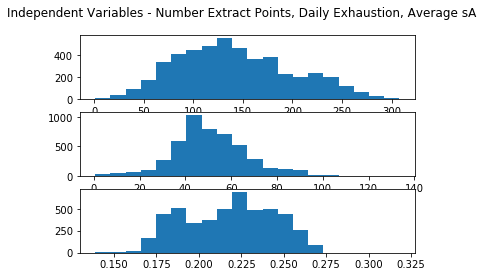

In [56]:
# Plotting Independent variables to see data structure
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Independent Variables - Number Extract Points, Daily Exhaustion, Average sA')
ax1.hist(daily_df.number_extract_points, bins=20)
ax2.hist(daily_df.average_exhaustion, bins=20)
ax3.hist(daily_df.average_sA, bins=20)
plt.show()
# Independent variables are relatively normally distributed

C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


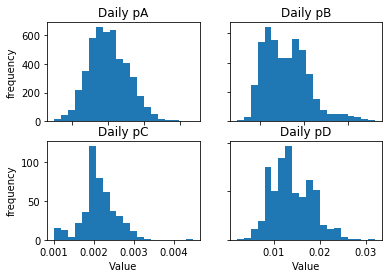

In [57]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(daily_assays['pA'],bins=20)
axs[0,0].set_title('Daily pA')
axs[0,1].hist(daily_assays['pB'],bins=20)
axs[0,1].set_title('Daily pB')
axs[1,0].hist(daily_assays['pC'],bins=20)
axs[1,0].set_title('Daily pC')
axs[1,1].hist(daily_assays['pD'],bins=20)
axs[1,1].set_title('Daily pD')

for ax in axs.flat:
    ax.set(xlabel='Value', ylabel='frequency')
for ax in axs.flat:
    ax.label_outer()
plt.show()
# Similar to independent values, dependent values are roughly normal as well

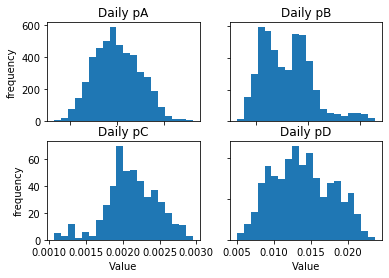

In [58]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(daily_assays['pA_ra'],bins=20)
axs[0,0].set_title('Daily pA')
axs[0,1].hist(daily_assays['pB_ra'],bins=20)
axs[0,1].set_title('Daily pB')
axs[1,0].hist(daily_assays['pC_ra'],bins=20)
axs[1,0].set_title('Daily pC')
axs[1,1].hist(daily_assays['pD_ra'],bins=20)
axs[1,1].set_title('Daily pD')

for ax in axs.flat:
    ax.set(xlabel='Value', ylabel='frequency')
for ax in axs.flat:
    ax.label_outer()
plt.show()
# Similar to independent values, dependent values are roughly normal as well

In [59]:
# Create dataframes for each output for daily and monthly
daily_composite = daily_df.merge(daily_assays,on='datestring')
daily_composite

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,month_x,year_x,year_month_x,date,...,pD,pC,month_y,year_y,year_month_y,day,pA_ra,pB_ra,pD_ra,pC_ra
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,06,2001,200106,6/2/2001,...,NaN,NaN,6,2001,200106,2,0.1830,NaN,NaN,NaN
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,06,2001,200106,6/4/2001,...,NaN,NaN,6,2001,200106,4,0.1810,NaN,NaN,NaN
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,06,2001,200106,6/5/2001,...,NaN,NaN,6,2001,200106,5,0.1845,NaN,NaN,NaN
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,06,2001,200106,6/6/2001,...,NaN,NaN,6,2001,200106,6,0.1836,NaN,NaN,NaN
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,06,2001,200106,6/7/2001,...,NaN,NaN,6,2001,200106,7,0.1850,NaN,NaN,NaN
5,20010611,41174.0,40.0,2.032639,0.174399,2.500000,06,2001,200106,6/11/2001,...,NaN,NaN,6,2001,200106,11,0.1892,NaN,NaN,NaN
6,20010612,59592.0,49.0,2.627655,0.207932,2.040816,06,2001,200106,6/12/2001,...,NaN,NaN,6,2001,200106,12,0.1890,NaN,NaN,NaN
7,20010613,52186.0,53.0,2.122619,0.221204,1.886792,06,2001,200106,6/13/2001,...,NaN,NaN,6,2001,200106,13,0.1950,NaN,NaN,NaN
8,20010614,9433.0,19.0,0.963405,0.167573,5.263158,06,2001,200106,6/14/2001,...,NaN,NaN,6,2001,200106,14,0.1938,NaN,NaN,NaN
9,20010618,2378.0,4.0,0.764851,0.255368,25.000000,06,2001,200106,6/18/2001,...,NaN,NaN,6,2001,200106,18,0.1934,NaN,NaN,NaN


In [60]:
daily_composite = daily_composite.drop(columns={'month_x','year_x','year_month_x','month_y','year_y','year_month_y','day','pA_ra','pB_ra','pD_ra','pC_ra'})
daily_composite

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,date,pA,pB,pD,pC
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,6/2/2001,0.182,NaN,NaN,NaN
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,6/4/2001,0.177,NaN,NaN,NaN
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,6/5/2001,0.195,NaN,NaN,NaN
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,6/6/2001,0.180,NaN,NaN,NaN
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,6/7/2001,0.191,NaN,NaN,NaN
5,20010611,41174.0,40.0,2.032639,0.174399,2.500000,6/11/2001,0.190,NaN,NaN,NaN
6,20010612,59592.0,49.0,2.627655,0.207932,2.040816,6/12/2001,0.194,NaN,NaN,NaN
7,20010613,52186.0,53.0,2.122619,0.221204,1.886792,6/13/2001,0.210,NaN,NaN,NaN
8,20010614,9433.0,19.0,0.963405,0.167573,5.263158,6/14/2001,0.185,NaN,NaN,NaN
9,20010618,2378.0,4.0,0.764851,0.255368,25.000000,6/18/2001,0.185,NaN,NaN,NaN


In [63]:
# Create dataframes for each output for daily and monthly
daily_composite_ra = daily_df.merge(daily_assays,on='datestring')
daily_composite_ra = daily_composite_ra.drop(columns={'month_x','year_x','year_month_x','month_y','year_y','year_month_y','day','pA','pB','pD','pC'})
daily_composite_ra = daily_composite_ra.rename(columns={'pA_ra':'pA','pB_ra':'pB','pD_ra':'pD','pC_ra':'pC'})
daily_composite_ra.head()

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,date,pA,pB,pD,pC
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,6/2/2001,0.1830,NaN,NaN,NaN
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,6/4/2001,0.1810,NaN,NaN,NaN
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,6/5/2001,0.1845,NaN,NaN,NaN
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,6/6/2001,0.1836,NaN,NaN,NaN
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,6/7/2001,0.1850,NaN,NaN,NaN


In [65]:
monthly_composite = monthly_data.merge(monthly_assays,on='year_month')
monthly_composite.head()

,year_month,actual_pA_x,month_x,year_x,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,actual_pA_y,month_y,year_y,average_pB,average_pD,average_pC
0,200106,0.187,6,2001,24282.0,33.0,2.26,0.0,6.19,17,1428.0,0.187,6,2001,NaN,NaN,NaN
1,200107,0.178,7,2001,23311.0,29.0,4.86,0.0,17.02,16,1457.0,0.178,7,2001,NaN,NaN,NaN
2,200108,0.194,8,2001,22717.0,59.0,8.82,0.0,3.12,16,1420.0,0.194,8,2001,NaN,NaN,NaN
3,200109,0.202,9,2001,21997.0,77.0,12.34,0.0,1.46,19,1158.0,0.202,9,2001,NaN,NaN,NaN
4,200110,0.190,10,2001,21640.0,76.0,15.53,0.0,1.40,23,941.0,0.190,10,2001,NaN,NaN,NaN


In [66]:
monthly_composite = monthly_composite.drop(columns={'actual_pA_x','month_x','year_x','month_y','year_y'})
monthly_composite = monthly_composite.rename(columns={'actual_pA_y':'average_pA'})
monthly_composite.head()

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,average_pA,average_pB,average_pD,average_pC
0,200106,24282.0,33.0,2.26,0.0,6.19,17,1428.0,0.187,NaN,NaN,NaN
1,200107,23311.0,29.0,4.86,0.0,17.02,16,1457.0,0.178,NaN,NaN,NaN
2,200108,22717.0,59.0,8.82,0.0,3.12,16,1420.0,0.194,NaN,NaN,NaN
3,200109,21997.0,77.0,12.34,0.0,1.46,19,1158.0,0.202,NaN,NaN,NaN
4,200110,21640.0,76.0,15.53,0.0,1.40,23,941.0,0.190,NaN,NaN,NaN


In [67]:
monthly_composite_ra = monthly_data.merge(monthly_assays_ra,on='year_month')
monthly_composite_ra = monthly_composite_ra.drop(columns={'actual_pA_x','month_x','year_x','month_y','year_y'})
monthly_composite_ra = monthly_composite_ra.rename(columns={'actual_pA_y':'average_pA'})
monthly_composite_ra.head()

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,average_pA,average_pB,average_pD,average_pC
0,200106,24282.0,33.0,2.26,0.0,6.19,17,1428.0,0.187,NaN,NaN,NaN
1,200107,23311.0,29.0,4.86,0.0,17.02,16,1457.0,0.178,NaN,NaN,NaN
2,200108,22717.0,59.0,8.82,0.0,3.12,16,1420.0,0.194,NaN,NaN,NaN
3,200109,21997.0,77.0,12.34,0.0,1.46,19,1158.0,0.202,NaN,NaN,NaN
4,200110,21640.0,76.0,15.53,0.0,1.40,23,941.0,0.190,NaN,NaN,NaN


In [68]:
# Export Daily and Monthly data for modeling in R
daily_composite.to_csv('../Data-Analytics-Final_Project/Resources/daily_composite.csv',index=False)
monthly_composite.to_csv('../Data-Analytics-Final_Project/Resources/monthly_composite.csv',index=False)
daily_composite_ra.to_csv('../Data-Analytics-Final_Project/Resources/daily_composite_ra.csv',index=False)
monthly_composite_ra.to_csv('../Data-Analytics-Final_Project/Resources/monthly_composite_ra.csv',index=False)

In [69]:
daily_composite.describe()

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,pA,pB,pD,pC
count,4.633000e+03,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,2334.000000,2335.000000,455.000000
mean,2.009755e+07,26807.236564,143.881718,50.999685,0.217831,0.892768,0.200107,1.598983,0.013849,0.002131
std,5.124526e+04,8374.797400,56.875430,16.172041,0.026429,1.685878,0.026830,0.507720,0.004409,0.000431
min,2.001060e+07,255.000000,1.000000,0.554372,0.145362,0.324675,0.125000,0.476000,0.002000,0.001000
25%,2.005120e+07,20934.000000,102.000000,41.604887,0.194090,0.552486,0.181000,1.189250,0.010333,0.001933
50%,2.009102e+07,27064.000000,138.000000,49.431510,0.220704,0.724638,0.198000,1.538833,0.013333,0.002100
75%,2.014043e+07,32820.000000,181.000000,60.203520,0.238989,0.980392,0.218000,1.920000,0.017000,0.002350
max,2.020033e+07,138455.000000,308.000000,125.648341,0.287335,100.000000,0.317000,3.616667,0.032000,0.004467


In [70]:
daily_composite_ra.describe()

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,pA,pB,pD,pC
count,4.633000e+03,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,2368.000000,2368.000000,470.000000
mean,2.009755e+07,26807.236564,143.881718,50.999685,0.217831,0.892768,0.200092,1.599389,0.013856,0.002122
std,5.124526e+04,8374.797400,56.875430,16.172041,0.026429,1.685878,0.023896,0.490275,0.003994,0.000347
min,2.001060e+07,255.000000,1.000000,0.554372,0.145362,0.324675,0.133800,0.638200,0.005000,0.001067
25%,2.005120e+07,20934.000000,102.000000,41.604887,0.194090,0.552486,0.182200,1.204600,0.010746,0.001928
50%,2.009102e+07,27064.000000,138.000000,49.431510,0.220704,0.724638,0.198600,1.550900,0.013600,0.002114
75%,2.014043e+07,32820.000000,181.000000,60.203520,0.238989,0.980392,0.217600,1.895800,0.017000,0.002363
max,2.020033e+07,138455.000000,308.000000,125.648341,0.287335,100.000000,0.280000,3.289800,0.023750,0.002950


In [71]:
monthly_composite.describe()

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,average_pA,average_pB,average_pD,average_pC
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,128.000000,128.000000,32.000000
mean,201040.720000,25840.075556,142.137778,51.495467,0.203714,0.960000,21.551111,1226.622222,0.215040,1.632456,0.013838,0.002103
std,546.876322,5897.838510,51.798921,16.681087,0.046005,1.198423,4.468972,290.250422,0.032208,0.503680,0.003783,0.000325
min,200106.000000,13234.000000,29.000000,2.260000,0.000000,0.390000,12.000000,647.000000,0.123000,0.841957,0.006130,0.001222
25%,200602.000000,20466.000000,104.000000,41.940000,0.192000,0.580000,18.000000,993.000000,0.192000,1.239727,0.010990,0.001915
50%,201011.000000,26083.000000,135.000000,49.990000,0.213000,0.770000,22.000000,1208.000000,0.219000,1.576834,0.013579,0.002125
75%,201507.000000,30835.000000,181.000000,61.450000,0.233000,1.030000,25.000000,1430.000000,0.239000,1.912727,0.016942,0.002348
max,202003.000000,37316.000000,261.000000,99.560000,0.274000,17.020000,31.000000,2307.000000,0.278000,3.051775,0.021154,0.002669


In [72]:
monthly_composite_ra.describe()

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,average_pA,average_pB,average_pD,average_pC
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,128.000000,128.000000,32.000000
mean,201040.720000,25840.075556,142.137778,51.495467,0.203714,0.960000,21.551111,1226.622222,0.215040,1.630972,0.013844,0.002101
std,546.876322,5897.838510,51.798921,16.681087,0.046005,1.198423,4.468972,290.250422,0.032208,0.502415,0.003791,0.000325
min,200106.000000,13234.000000,29.000000,2.260000,0.000000,0.390000,12.000000,647.000000,0.123000,0.852035,0.006209,0.001197
25%,200602.000000,20466.000000,104.000000,41.940000,0.192000,0.580000,18.000000,993.000000,0.192000,1.227523,0.010875,0.001936
50%,201011.000000,26083.000000,135.000000,49.990000,0.213000,0.770000,22.000000,1208.000000,0.219000,1.571409,0.013560,0.002082
75%,201507.000000,30835.000000,181.000000,61.450000,0.233000,1.030000,25.000000,1430.000000,0.239000,1.909855,0.016858,0.002351
max,202003.000000,37316.000000,261.000000,99.560000,0.274000,17.020000,31.000000,2307.000000,0.278000,3.086557,0.021138,0.002658
